## Natural language processing has extensively applied in sentiment analysis as a significant challenge. In this scenario, the objective is to determine if the tweets shared by customers regarding technology companies that produce and sell mobiles, computers, laptops, and similar products express positive sentiment or negative sentiment.
## Objective :
---
---
## The goal will be to build a system that can accurately classify the new tweets sentiments. You can divide the data into train and test. The Evaluation metric you should use is the accuracy.

# 1. Data Loading and Initial Exploration
---

In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/content/tweets.csv')

# Display the first few rows of the dataframe
print("Head of the DataFrame:")
print(df.head())

# Display information about the dataframe
print("\nDataFrame Info:")
df.info()

# Display the distribution of labels
print("\nLabel Distribution:")
print(df['label'].value_counts())

Head of the DataFrame:
   id  label                                              tweet
0   1      0  #fingerprint #Pregnancy Test https://goo.gl/h1...
1   2      0  Finally a transparant silicon case ^^ Thanks t...
2   3      0  We love this! Would you go? #talk #makememorie...
3   4      0  I'm wired I know I'm George I was made that wa...
4   5      1  What amazing service! Apple won't even talk to...

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB

Label Distribution:
label
0    5894
1    2026
Name: count, dtype: int64


#2. Data Preprocessing and Cleaning
---

In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function for text preprocessing
def preprocess_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove user @ references and '#' from tweet
    tweet = re.sub(r'\@\w+|\#','', tweet)
    # Convert to lower case
    tweet = tweet.lower()
    # Remove punctuations
    tweet = re.sub(r'[^\w\s]', '', tweet)
    # Remove numbers
    tweet = re.sub(r'\d+', '', tweet)
    # Tokenize the tweet
    tweet_tokens = tweet.split()
    # Lemmatize and remove stop words
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tweet_tokens if word not in stopwords.words('english')]
    return " ".join(cleaned_tokens)

# Apply the preprocessing function to the tweet column
df['cleaned_tweet'] = df['tweet'].apply(preprocess_tweet)

print("\nDataFrame with cleaned tweets:")
print(df[['tweet', 'cleaned_tweet']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...



DataFrame with cleaned tweets:
                                               tweet  \
0  #fingerprint #Pregnancy Test https://goo.gl/h1...   
1  Finally a transparant silicon case ^^ Thanks t...   
2  We love this! Would you go? #talk #makememorie...   
3  I'm wired I know I'm George I was made that wa...   
4  What amazing service! Apple won't even talk to...   

                                       cleaned_tweet  
0  fingerprint pregnancy test android apps beauti...  
1  finally transparant silicon case thanks uncle ...  
2  love would go talk makememories unplug relax i...  
3  im wired know im george made way iphone cute d...  
4  amazing service apple wont even talk question ...  


#3. Feature Engineering: TF-IDF Vectorization
---

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Fit and transform the cleaned tweets
X = tfidf_vectorizer.fit_transform(df['cleaned_tweet'])
y = df['label']

# Display the shape of the TF-IDF matrix
print("\nShape of the TF-IDF matrix:")
print(X.shape)


Shape of the TF-IDF matrix:
(7920, 5000)


#4. Model Building and Training
---

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

#5. Model Evaluation
---


Model Accuracy: 0.8756

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1152
           1       0.86      0.65      0.74       432

    accuracy                           0.88      1584
   macro avg       0.87      0.80      0.83      1584
weighted avg       0.87      0.88      0.87      1584


Confusion Matrix:
[[1108   44]
 [ 153  279]]


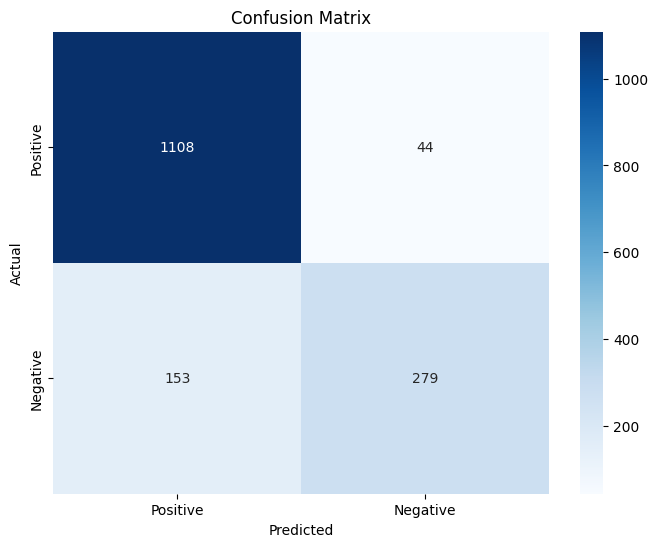

In [5]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.4f}")

# Display the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Display the confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#6.Testing
---

In [6]:

# Function to predict sentiment of a new tweet
def predict_sentiment(tweet_text):
    # Preprocess the new tweet
    cleaned_text = preprocess_tweet(tweet_text)
    # Transform the text using the trained TF-IDF vectorizer
    vectorized_text = tfidf_vectorizer.transform([cleaned_text])
    # Predict using the trained model
    prediction = model.predict(vectorized_text)

    if prediction[0] == 0:
        return "Positive"
    else:
        return "Negative"

# Test with a positive tweet
positive_tweet = "I love my new Samsung phone, the camera is amazing!"
print(f"\nTesting tweet: '{positive_tweet}'")
print(f"Predicted Sentiment: {predict_sentiment(positive_tweet)}")

# Test with a negative tweet
negative_tweet = "My Apple laptop is so slow and the battery life is terrible. I hate it."
print(f"\nTesting tweet: '{negative_tweet}'")
print(f"Predicted Sentiment: {predict_sentiment(negative_tweet)}")

# Test with another negative tweet
negative_tweet_2 = "This software update is a complete mess, it crashed my phone."
print(f"\nTesting tweet: '{negative_tweet_2}'")
print(f"Predicted Sentiment: {predict_sentiment(negative_tweet_2)}")


Testing tweet: 'I love my new Samsung phone, the camera is amazing!'
Predicted Sentiment: Positive

Testing tweet: 'My Apple laptop is so slow and the battery life is terrible. I hate it.'
Predicted Sentiment: Negative

Testing tweet: 'This software update is a complete mess, it crashed my phone.'
Predicted Sentiment: Negative


#Conclusion
---
1. High Accuracy on Positive Tweets: The model is very good at identifying positive tweets. It correctly identified 1108 out of 1152 (1108 + 44) positive tweets.
2. Moderate Accuracy on Negative Tweets: The model is less accurate with negative tweets. It correctly identified 279 out of 432 (153 + 279) negative tweets. It has a higher tendency to mistake a negative tweet for a positive one (153 instances).

Overall Accuracy: Based on these numbers, the model's accuracy is calculated as:

(Correct Predictions)/(Total Predictions) = (1108 + 279) / (1108 + 44 + 153 + 279) = 1387 / 1584 ≈ 87.56%